In [1]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

base


In [2]:
import pandas as pd
import numpy as np
import wbgapi as wb

# 1.Setting up the data

In [3]:
df_country = pd.read_csv('CountrUsedN(1).csv')

country_name_list = df_country['country'].tolist()

country_list = list(wb.economy.coder(country_name_list).values())
country_set = set(country_list)
 
# years of interest
year_list = range(1994, 2022)

# measures of interest
wb_measures_list = df_country['Index'].tolist()

# import the data from the API
raw_dat = wb.data.DataFrame(wb_measures_list, country_set, year_list)

raw_dat = raw_dat.reset_index()


This will create a Pandas DataFrame that represents the data in the CountrUsedN(1).csv file. You can then perform operations on the DataFrame to manipulate and analyze the data.

In [4]:
raw_dat['series'] = raw_dat['series']+'_'+ raw_dat['economy']
raw_dat_t = raw_dat.drop(['economy'],axis=1).T

raw_dat_t.columns = list(raw_dat_t.iloc[0,:])

raw_dat_t = raw_dat_t.iloc[1:,:]

In [5]:
raw_dat_t.head()

,EG.FEC.RNEW.ZS_ARG,EN.ATM.CO2E.KT_ARG,NE.TRD.GNFS.ZS_ARG,NV.MNF.TECH.ZS.UN_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,SP.URB.TOTL.IN.ZS_ARG,EG.FEC.RNEW.ZS_ARM,EN.ATM.CO2E.KT_ARM,NE.TRD.GNFS.ZS_ARM,...,NY.GDP.MKTP.PP.KD_USA,SP.POP.TOTL_USA,SP.URB.TOTL.IN.ZS_USA,EG.FEC.RNEW.ZS_ZAF,EN.ATM.CO2E.KT_ZAF,NE.TRD.GNFS.ZS_ZAF,NV.MNF.TECH.ZS.UN_ZAF,NY.GDP.MKTP.PP.KD_ZAF,SP.POP.TOTL_ZAF,SP.URB.TOTL.IN.ZS_ZAF
YR1994,10.734909,111910.0,18.134346,29.628354,622413803601.144043,34402669.0,87.96,17.763653,2740.0,112.429365,...,11161399723961.699219,263126000.0,76.875,18.562882,252140.0,37.114609,30.230049,419376463045.297974,40564061.0,54.004
YR1995,11.205185,112890.0,19.771423,27.200513,604704826243.564941,34828168.0,88.164,9.274353,3510.0,86.114857,...,11460995943158.0,266278000.0,77.257,18.11308,264310.0,39.478034,31.7511,432377133401.984009,41435761.0,54.486
YR1996,10.193856,122550.0,21.506468,28.563551,638124986359.866943,35246376.0,88.366,12.473304,2580.0,79.22956,...,11893369521975.900391,269394000.0,77.636,17.437771,274110.0,42.199252,30.629688,450969350126.45697,42241007.0,54.967
YR1997,10.999073,126120.0,23.336179,30.983214,689883602459.331055,35657438.0,88.564,10.120114,3340.0,78.547745,...,12422288471502.599609,272657000.0,78.008,17.107191,289030.0,42.301334,30.437577,462694553236.343994,42987456.0,55.449
YR1998,11.343009,132670.0,23.350028,30.443321,716445355021.615967,36063451.0,88.759,9.380563,3470.0,71.842452,...,12978980215336.0,275854000.0,78.377,17.27249,296490.0,44.035745,29.368574,465008026004.106018,43682259.0,55.93


Above table show the first five rows of the DataFrame 

# 2. Missing value inputation
## a. Removing the columns with more than 25 null values
## b. Filling nan with knn inputation technique

KNN imputation works by finding the k number of nearest neighbors to a given data point, and using the values of those neighbors to impute the missing value.

In [6]:
nan_sum = raw_dat_t.isna().sum()
raw_dat_t.dropna(thresh=len(raw_dat_t) - 3, axis=1,inplace=True)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
raw_dat_inputed = pd.DataFrame(imputer.fit_transform(raw_dat_t))

raw_dat_inputed.columns = raw_dat_t.columns

Above code will create a KNN imputer with 2 nearest neighbors, fit it to the data, and use it to impute missing values in the dataset.

# 3. Creating response CO2 per capita by dividing CO2 emission by total population

In [7]:
response = pd.DataFrame(raw_dat_inputed.filter(regex='EN.ATM.CO2E.KT').values/raw_dat_inputed.filter(regex='SP.POP.TOTL').values)

In [8]:
response.columns = ['CO2_per_capita' +'_'+i.split('_')[1] for i in raw_dat_inputed.filter(regex='EN.ATM.CO2E.KT').columns]

In [9]:
final_data = pd.concat([raw_dat_inputed,response],axis=1)

In [10]:
final_data.head()

,EG.FEC.RNEW.ZS_ARG,EN.ATM.CO2E.KT_ARG,NE.TRD.GNFS.ZS_ARG,NV.MNF.TECH.ZS.UN_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,SP.URB.TOTL.IN.ZS_ARG,EG.FEC.RNEW.ZS_ARM,EN.ATM.CO2E.KT_ARM,NE.TRD.GNFS.ZS_ARM,...,CO2_per_capita_RUS,CO2_per_capita_SGP,CO2_per_capita_SRB,CO2_per_capita_SVK,CO2_per_capita_SVN,CO2_per_capita_SWE,CO2_per_capita_TUR,CO2_per_capita_UKR,CO2_per_capita_USA,CO2_per_capita_ZAF
0,10.734909,111910.0,18.134346,29.628354,6.224138e+11,34402669.0,87.960,17.763653,2740.0,112.429365,...,0.011354,0.011108,0.005029,0.007800,0.006841,0.006661,0.002672,0.008006,0.019256,0.006216
1,11.205185,112890.0,19.771423,27.200513,6.047048e+11,34828168.0,88.164,9.274353,3510.0,86.114857,...,0.011023,0.010662,0.005842,0.007902,0.007272,0.006597,0.002875,0.007751,0.019217,0.006379
2,10.193856,122550.0,21.506468,28.563551,6.381250e+11,35246376.0,88.366,12.473304,2580.0,79.229560,...,0.010807,0.010494,0.006780,0.007848,0.007689,0.007199,0.003119,0.006779,0.019575,0.006489
3,10.999073,126120.0,23.336179,30.983214,6.898836e+11,35657438.0,88.564,10.120114,3340.0,78.547745,...,0.010070,0.010053,0.007413,0.007852,0.007921,0.006487,0.003204,0.006488,0.020331,0.006724
4,11.343009,132670.0,23.350028,30.443321,7.164454e+11,36063451.0,88.759,9.380563,3470.0,71.842452,...,0.010076,0.009434,0.007428,0.007680,0.007822,0.006594,0.003158,0.006168,0.020266,0.006787


# 4. Functional Data Analysis

In [11]:
raw_dat_t.shape

(28, 392)

In [12]:
final_data.shape

(28, 448)

Making index of final data same as previous original data.

In [ ]:
final_data.index = raw_dat_t.index

In [14]:
final_data.head()

,EG.FEC.RNEW.ZS_ARG,EN.ATM.CO2E.KT_ARG,NE.TRD.GNFS.ZS_ARG,NV.MNF.TECH.ZS.UN_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,SP.URB.TOTL.IN.ZS_ARG,EG.FEC.RNEW.ZS_ARM,EN.ATM.CO2E.KT_ARM,NE.TRD.GNFS.ZS_ARM,...,CO2_per_capita_RUS,CO2_per_capita_SGP,CO2_per_capita_SRB,CO2_per_capita_SVK,CO2_per_capita_SVN,CO2_per_capita_SWE,CO2_per_capita_TUR,CO2_per_capita_UKR,CO2_per_capita_USA,CO2_per_capita_ZAF
YR1994,10.734909,111910.0,18.134346,29.628354,6.224138e+11,34402669.0,87.960,17.763653,2740.0,112.429365,...,0.011354,0.011108,0.005029,0.007800,0.006841,0.006661,0.002672,0.008006,0.019256,0.006216
YR1995,11.205185,112890.0,19.771423,27.200513,6.047048e+11,34828168.0,88.164,9.274353,3510.0,86.114857,...,0.011023,0.010662,0.005842,0.007902,0.007272,0.006597,0.002875,0.007751,0.019217,0.006379
YR1996,10.193856,122550.0,21.506468,28.563551,6.381250e+11,35246376.0,88.366,12.473304,2580.0,79.229560,...,0.010807,0.010494,0.006780,0.007848,0.007689,0.007199,0.003119,0.006779,0.019575,0.006489
YR1997,10.999073,126120.0,23.336179,30.983214,6.898836e+11,35657438.0,88.564,10.120114,3340.0,78.547745,...,0.010070,0.010053,0.007413,0.007852,0.007921,0.006487,0.003204,0.006488,0.020331,0.006724
YR1998,11.343009,132670.0,23.350028,30.443321,7.164454e+11,36063451.0,88.759,9.380563,3470.0,71.842452,...,0.010076,0.009434,0.007428,0.007680,0.007822,0.006594,0.003158,0.006168,0.020266,0.006787


In [15]:
import skfda

In [16]:
import matplotlib.pyplot as plt

Transposing dataset to convert years from row to column.

In [17]:
final_data = final_data.T.reset_index()

In [18]:
final_data.head()

,index,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,EG.FEC.RNEW.ZS_ARG,1.073491e+01,1.120518e+01,1.019386e+01,1.099907e+01,1.134301e+01,1.030617e+01,9.850000e+00,1.151000e+01,1.162000e+01,...,8.610000e+00,8.910000e+00,9.790000e+00,9.400000e+00,9.380000e+00,1.037000e+01,1.052000e+01,1.074000e+01,1.063000e+01,1.063000e+01
1,EN.ATM.CO2E.KT_ARG,1.119100e+05,1.128900e+05,1.225500e+05,1.261200e+05,1.326700e+05,1.345100e+05,1.322700e+05,1.252600e+05,1.174700e+05,...,1.779600e+05,1.832500e+05,1.796000e+05,1.855500e+05,1.831600e+05,1.793200e+05,1.769000e+05,1.681000e+05,1.725000e+05,1.725000e+05
2,NE.TRD.GNFS.ZS_ARG,1.813435e+01,1.977142e+01,2.150647e+01,2.333618e+01,2.335003e+01,2.138274e+01,2.262244e+01,2.185226e+01,4.175272e+01,...,3.052654e+01,2.933393e+01,2.840679e+01,2.248623e+01,2.609389e+01,2.528960e+01,3.076254e+01,3.221445e+01,3.014814e+01,3.342920e+01
3,NV.MNF.TECH.ZS.UN_ARG,2.962835e+01,2.720051e+01,2.856355e+01,3.098321e+01,3.044332e+01,2.810712e+01,2.859574e+01,2.698261e+01,2.600065e+01,...,2.697555e+01,2.734322e+01,2.611319e+01,2.603289e+01,2.761984e+01,2.809410e+01,2.761229e+01,2.633918e+01,2.697573e+01,2.697573e+01
4,NY.GDP.MKTP.PP.KD_ARG,6.224138e+11,6.047048e+11,6.381250e+11,6.898836e+11,7.164454e+11,6.921904e+11,6.867290e+11,6.564522e+11,5.849352e+11,...,1.006559e+12,1.030770e+12,1.004871e+12,1.032316e+12,1.010840e+12,1.039331e+12,1.012127e+12,9.916222e+11,8.934985e+11,9.852050e+11


In [19]:
data_matrix = final_data[final_data['index'].str.contains('EN.ATM.CO2E.KT')].iloc[:,1:].values

In [20]:
grid_points=list(range(1994,2022,1))

In [21]:
fd = skfda.FDataGrid(
    data_matrix=data_matrix.tolist(),
    grid_points=grid_points,
)

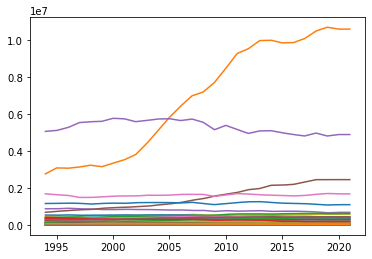

In [22]:
fd.plot()
plt.show()

## In above graph, it is difficult to differentiate between the lines, so therefore we can use np.log to make it more visible to user

By applying the logarithm transformation, 
you can compress the scale of the data and bring more detail into view.

The graph doesn’t explain the variability of the co2 for every year. It’s because there is a high difference between the values.


0.8406826459974687


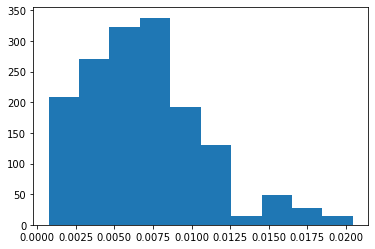

In [23]:
# investigate the skewness of the response
tot_pop = final_data[final_data['index'].str.contains('SP.POP.TOTL')].iloc[:,1:].values
co2 = final_data[final_data['index'].str.contains('EN.ATM.CO2E.KT')].iloc[:,1:].values
from scipy.stats import skew
CO2perCapita = co2/tot_pop
dummy=CO2perCapita.flatten()
print(skew(dummy))
plt.hist(dummy)
plt.show()

## Above graphs represents, reponse which is CO2percapita is rightly skewed

In [24]:
logCO2perCap = np.log(CO2perCapita) 
logCO2perCap_list = logCO2perCap.tolist()

grid_points=list(range(1994,2022,1))

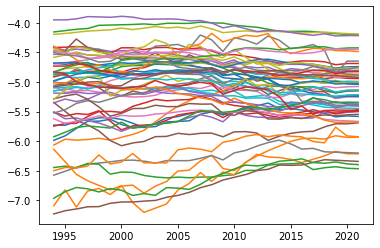

In [25]:
fd = skfda.FDataGrid(
    data_matrix=logCO2perCap_list,
    grid_points=grid_points,
)
fd.plot()
plt.show()

## By using log, the graph looks visible

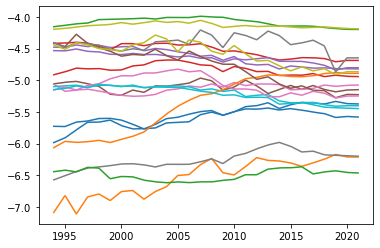

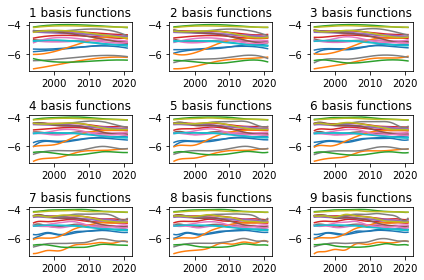

In [26]:
max_basis = 9

# Select only the first 5 samples
fd1 = fd[:20]
fd1.plot()

fig, axes = plt.subplots(nrows=3, ncols=3)

for n_basis in range(1, max_basis + 1):
#     print (n_basis)
    basis = skfda.representation.basis.BSplineBasis(n_basis=n_basis+3)
    X_basis = fd1.to_basis(basis)

    ax = axes.ravel()[n_basis - 1]
    fig = X_basis.plot(axes=ax)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()

## As the number of basis function increases the overfitting risk, because the fit gets too much aligned with the data points

We can see that increasing the number of basis functions makes a better model, until we start overfitting.

In [27]:
# basis = skfda.representation.basis.BSplineBasis(n_basis=7)
# X_basis = fd.to_basis(basis)
# new_fd = X_basis.to_grid()

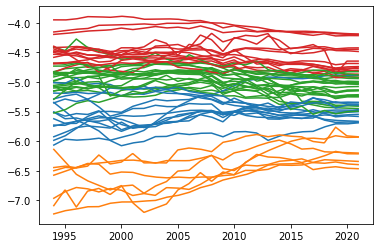

In [28]:
clusterer = skfda.ml.clustering.KMeans(n_clusters=4)
y_pred = clusterer.fit_predict(fd)

fd.plot(group=y_pred)
plt.show()

Running the above code create the synthetic clustering dataset, then creates a  plot of the input data with points colored by class label (idealized clusters).

We can clearly see four groups of data s and the hope would be that an automatic clustering algorithm can detect these groupings.

/Users/shikhasharma/opt/anaconda3/lib/python3.9/site-packages/skfda/representation/grid.py:788: RuntimeWarning: invalid value encountered in true_divide
  return self._copy_op(other, data_matrix=self.data_matrix / data_matrix)


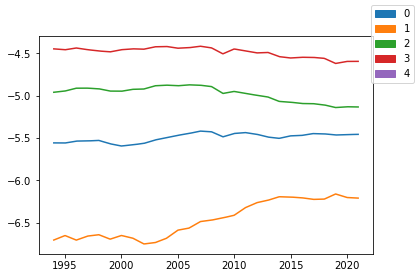

In [29]:
mean0 = skfda.exploratory.stats.mean(fd[y_pred==0])
mean1 = skfda.exploratory.stats.mean(fd[y_pred==1])
mean2 = skfda.exploratory.stats.mean(fd[y_pred==2])
mean3 = skfda.exploratory.stats.mean(fd[y_pred==3])
mean4 = skfda.exploratory.stats.mean(fd[y_pred==4])
# mean5 = skfda.exploratory.stats.mean(fd[y_pred==5])
means = mean0.concatenate(mean1,mean2,mean3,mean4)
means.plot(
    group=['0', '1','2','3','4'],
    linewidth=1.5,
    legend=True,
)
plt.show()

In above plot shows four differnt cluster

In [30]:
ClusRes=pd.DataFrame()
ClusRes['economy']=country_list
ClusRes['cluster_label']=y_pred

In [31]:
ClusRes['cluster_label'].value_counts()

2    21
3    15
0    13
1     7
Name: cluster_label, dtype: int64

In [32]:
covariate = pd.DataFrame(final_data[(final_data['index'].str.contains('NY.GDP.MKTP.PP.KD'))][[i for i in final_data.columns if 'YR' in i]].values/final_data[(final_data['index'].str.contains('SP.POP.TOTL'))][[i for i in final_data.columns if 'YR' in i]].values)
response = final_data[(final_data['index'].str.contains('CO2_per_capita'))]

In [33]:
final_data['economy'] = final_data['index'].apply(lambda x: x.split('_')[1])
final_data['index'] = final_data['index'].apply(lambda x: x.split('_')[0])

In [34]:
covariate.columns = ['YR'+str(i) for i in range(1994,2022,1)]
covariate['economy'] = final_data[(final_data['index'].str.contains('NY.GDP.MKTP.PP.KD'))]['economy'].tolist()
covariate['index'] = final_data[(final_data['index'].str.contains('NY.GDP.MKTP.PP.KD'))]['economy'].tolist()

In [35]:
response['cluster_label'] = y_pred

/var/folders/9_/9_vdfkwj6_qftctb6wldl84m0000gn/T/ipykernel_94604/3400816811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response['cluster_label'] = y_pred


In [36]:
covariate['cluster_label'] = y_pred

In [37]:
# covariate

In [38]:
non_scaled_gdp = covariate.groupby(['cluster_label'])[['YR'+str(i) for i in range(1994,2022,1)]].mean()

The GroupBy object simply has all of the information it needs about the nature of the grouping.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_gdp = scaler.fit_transform(non_scaled_gdp.values)
scaled_gdp

array([[-0.50150873, -0.50948767, -0.49905089, -0.48513467, -0.4699048 ,
        -0.48546924, -0.48527037, -0.48113459, -0.47643759, -0.46020151,
        -0.4446938 , -0.4297673 , -0.41573739, -0.41404792, -0.4121837 ,
        -0.44894206, -0.44899148, -0.4412539 , -0.44956737, -0.44128998,
        -0.43722593, -0.42254505, -0.41188759, -0.3958477 , -0.3880082 ,
        -0.38082533, -0.35303326, -0.33911545],
       [-1.37724591, -1.36823269, -1.37447948, -1.38087174, -1.39327278,
        -1.37929003, -1.37587789, -1.37955446, -1.37920782, -1.38546171,
        -1.39183481, -1.39623023, -1.40206769, -1.39960577, -1.40522125,
        -1.38519482, -1.37350656, -1.36931112, -1.35680314, -1.35607787,
        -1.35214208, -1.35046317, -1.35891402, -1.36123407, -1.36250371,
        -1.36588665, -1.37192886, -1.36748123],
       [ 0.73102284,  0.70924664,  0.70579296,  0.69129303,  0.7054637 ,
         0.68417099,  0.66643752,  0.6712527 ,  0.65479973,  0.63519118,
         0.61941265,  0.5977

Scale the features of a dataset so that all the features have zero mean and unit variance.

In [40]:
non_scaled_co2 = response.groupby(['cluster_label'])[['YR'+str(i) for i in range(1994,2022,1)]].mean()

In [41]:
scaled_co2 = scaler.fit_transform(non_scaled_co2.values)
scaled_co2

array([[-0.526165  , -0.53635423, -0.53178047, -0.53817739, -0.53053664,
        -0.53108028, -0.5575968 , -0.5574618 , -0.53586575, -0.53373461,
        -0.52831702, -0.51758427, -0.51373374, -0.50815111, -0.50753399,
        -0.50839755, -0.50611248, -0.4982434 , -0.51185176, -0.53143964,
        -0.5259347 , -0.49393188, -0.48121995, -0.45503583, -0.44863196,
        -0.45288731, -0.44430519, -0.43896126],
       [-1.21534994, -1.21908407, -1.23358123, -1.2317448 , -1.23559775,
        -1.22959114, -1.19718489, -1.20538   , -1.22630653, -1.23402319,
        -1.23671687, -1.24344727, -1.24907003, -1.23541114, -1.23523088,
        -1.2247381 , -1.20975976, -1.203896  , -1.19128253, -1.15939089,
        -1.15371609, -1.17808142, -1.17248083, -1.1897178 , -1.18835884,
        -1.18823741, -1.19351333, -1.19529968],
       [ 0.26675508,  0.2923234 ,  0.31821832,  0.325114  ,  0.32083338,
         0.30758908,  0.27897428,  0.29725921,  0.30820105,  0.32270589,
         0.31960478,  0.3168

In [42]:
df_scaled_co2 = pd.DataFrame(scaled_co2,columns=['YR'+str(i) for i in range(1994,2022,1)])

In [43]:
df_scaled_gdp = pd.DataFrame(scaled_gdp,columns=['YR'+str(i) for i in range(1994,2022,1)])

In [44]:
df_scaled_gdp

,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,YR2003,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,-0.501509,-0.509488,-0.499051,-0.485135,-0.469905,-0.485469,-0.485270,-0.481135,-0.476438,-0.460202,...,-0.449567,-0.441290,-0.437226,-0.422545,-0.411888,-0.395848,-0.388008,-0.380825,-0.353033,-0.339115
1,-1.377246,-1.368233,-1.374479,-1.380872,-1.393273,-1.379290,-1.375878,-1.379554,-1.379208,-1.385462,...,-1.356803,-1.356078,-1.352142,-1.350463,-1.358914,-1.361234,-1.362504,-1.365887,-1.371929,-1.367481
2,0.731023,0.709247,0.705793,0.691293,0.705464,0.684171,0.666438,0.671253,0.654800,0.635191,...,0.499770,0.479727,0.459008,0.425025,0.429423,0.405953,0.395210,0.391783,0.359773,0.324734
3,1.147732,1.168474,1.167737,1.174713,1.157714,1.180588,1.194711,1.189436,1.200846,1.210472,...,1.306600,1.317641,1.330360,1.347983,1.341379,1.351129,1.355301,1.354929,1.365190,1.381862


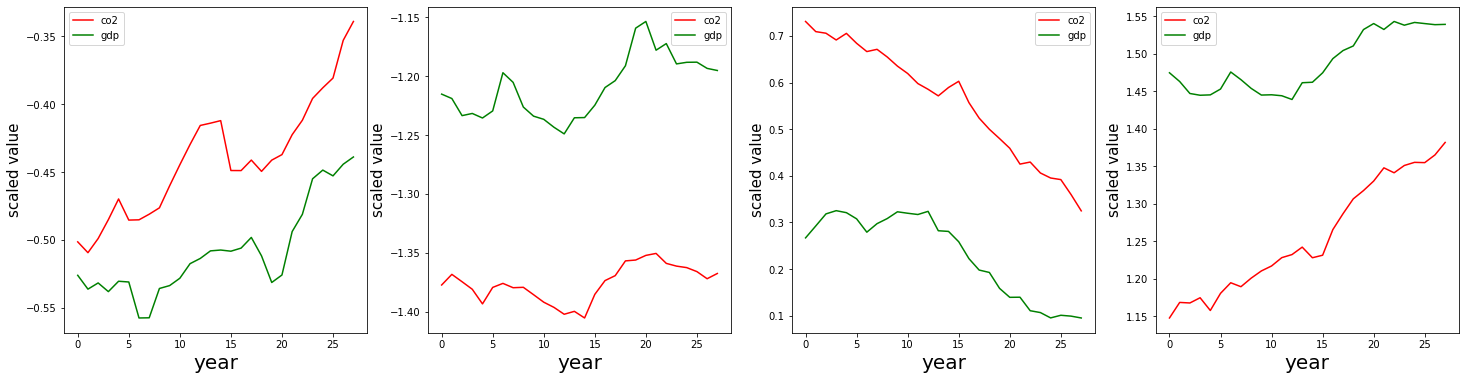

In [45]:
import matplotlib.pyplot as plt
# fig.set_size_inches(18.5, 30.5)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 6))
# fig.tight_layout()
# plt.xlabel('year')
# plt.ylabel('year')
# plt.tick_params( top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")
for i in range(len(df_scaled_gdp)):
    
#     x = [str(i) for i in range(1994,2022,1)]
    axes[i].plot(df_scaled_gdp.iloc[i,:].values, color='r', label='co2')
    axes[i].plot(df_scaled_co2.iloc[i,:].values, color='g', label='gdp')

    axes[i].set_xlabel("year",fontsize=20)
    axes[i].set_ylabel("scaled value",fontsize=15)
    
    axes[i].legend()
#     plt.show()
# df_scaled_gdp.iloc[0,:].plot()

## Each group showing different relation of co2-gdp

In above graph it shows that 1st, 2nd and last graph shows the Gdp and Co2 incease but in 3rd graph it shows that CO2 and GDP is decreasing.Clusters are formed by grouping the cluster and taking the mean of GDP and co2 per capita. 
Cluster 4 contains the developed countries and Kazakhstan.

In [46]:
covariate[covariate['cluster_label']==0].loc[:,'economy']

0     ARG
10    CHL
11    CHN
23    HRV
24    HUN
33    LTU
34    LVA
35    MDA
36    MEX
44    PRT
45    ROU
51    SWE
52    TUR
Name: economy, dtype: object

These shows the economy of cluster 0.

In [106]:
covariate[covariate['cluster_label']==1].loc[:,'economy']

1     ARM
7     BRA
12    COL
21    GEO
25    IND
41    PAN
42    PER
Name: economy, dtype: object

These shows the economy of cluster 1.

In [107]:
covariate[covariate['cluster_label']==2].loc[:,'economy']

3     AUT
5     BGR
6     BLR
9     CHE
15    DNK
16    ESP
19    FRA
20    GBR
22    GRC
27    ISL
28    ISR
29    ITA
37    MYS
39    NOR
40    NZL
43    POL
48    SRB
49    SVK
50    SVN
53    UKR
55    ZAF
Name: economy, dtype: object

These shows the economy of cluster 2.

In [108]:
covariate[covariate['cluster_label']==3].loc[:,'economy']

2     AUS
4     BEL
8     CAN
13    CZE
14    DEU
17    EST
18    FIN
26    IRL
30    JPN
31    KAZ
32    KOR
38    NLD
46    RUS
47    SGP
54    USA
Name: economy, dtype: object

These shows the economy of cluster 4.

In [47]:
# df_scaled_gdp

In [48]:
# df_scaled_gdp.iloc[0,:]
# scaled_covariate = scaler.fit_transform(covariate.iloc[:,:-3])

In [49]:
# scaler.fit_transform()
# model2.predict(scaled_covariate[37])

In [50]:
# scaled_resp = scaler.fit_transform(response.iloc[:,1:29])

In [51]:
# scaled_resp[37] + res_list[1]

In [52]:
# res_list

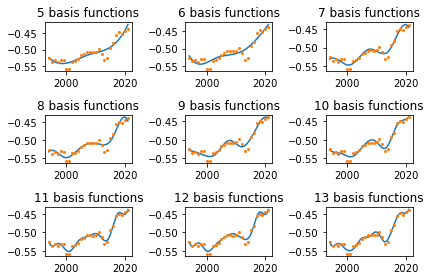

In [53]:
cluster1=pd.DataFrame()
cluster1['values']=df_scaled_co2.iloc[0,:].tolist()
cluster1['Years']=df_scaled_co2.columns
# cluster1

# data_matrix=CO2_list
X = skfda.FDataGrid(
    data_matrix=cluster1['values'].tolist(),
    grid_points=grid_points,
)

fig, axes = plt.subplots(nrows=3, ncols=3)
for n_basis in range(5, 14):
    basis = skfda.representation.basis.BSpline(n_basis=n_basis)
    X_basis = X.to_basis(basis)
    ax = axes.ravel()[n_basis - 5]
    #ax=axes
    fig = X_basis.plot(axes=ax)
    ax.plot(grid_points,df_scaled_co2.iloc[0,:].tolist(),'o',markersize=2)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()  

This is the basic representation of cluster1 and when you see that if you are increasing the basis function number the function tends to overfit with the scatter plot.


The Autocorrelation plot for the data is:
The Autocorrelation plot for the data is:
The Autocorrelation plot for the data is:
The Autocorrelation plot for the data is:


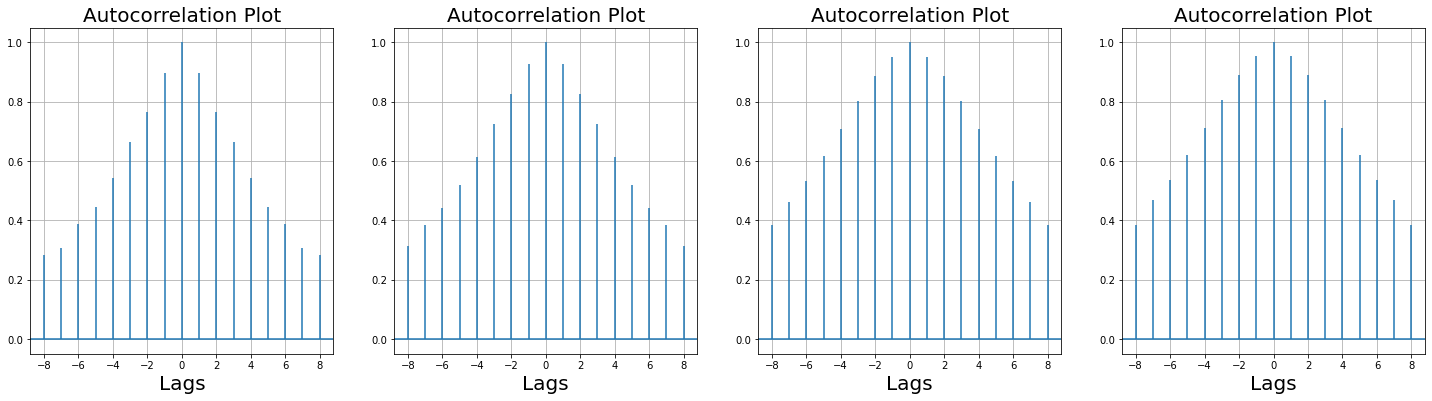

In [54]:
# calculate the "residual after fitting a curve to
# CO2 in USA
fig, ax = plt.subplots(1,4, figsize=(25,6))
n_basis=9

for i in range(len(df_scaled_co2)):
    cluster1=pd.DataFrame()
    cluster1['values']=df_scaled_co2.iloc[i,:].tolist()
    cluster1['Years']=df_scaled_co2.columns
    # cluster1

    # data_matrix=CO2_list
    X = skfda.FDataGrid(
        data_matrix=cluster1['values'].tolist(),
        grid_points=grid_points,
    )
    
    basis = skfda.representation.basis.BSpline(n_basis=n_basis)
    #evaluate the fucntion at the spesific time points 
    X_basis = X.to_basis(basis)
    diff = df_scaled_co2.iloc[i,:].tolist() - X_basis(grid_points)
    #diff
    x = np.reshape(diff,diff.size) 
    mean = np.mean(x)
    var = np.var(x)
    ndata = x - mean
    acorr = np.correlate(ndata, ndata, 'full')[len(ndata)-1:] 
    acorr = acorr / var / len(ndata)
#     print(len(acorr))
    # Adding plot title.
    ax[i].set_title("Autocorrelation Plot",fontsize=20)
    # Providing x-axis name.
    ax[i].set_xlabel("Lags",fontsize=20)
    # Plotting the Autocorrelation plot.
    ax[i].acorr(x, maxlags = 8)
    print("The Autocorrelation plot for the data is:")
    ax[i].grid(True)
#     plt.show()

By selecting the basis function equal to 9 we plot the autocorrelation plot of each cluster and we can see that each cluster is having a correlation with the lagging term.


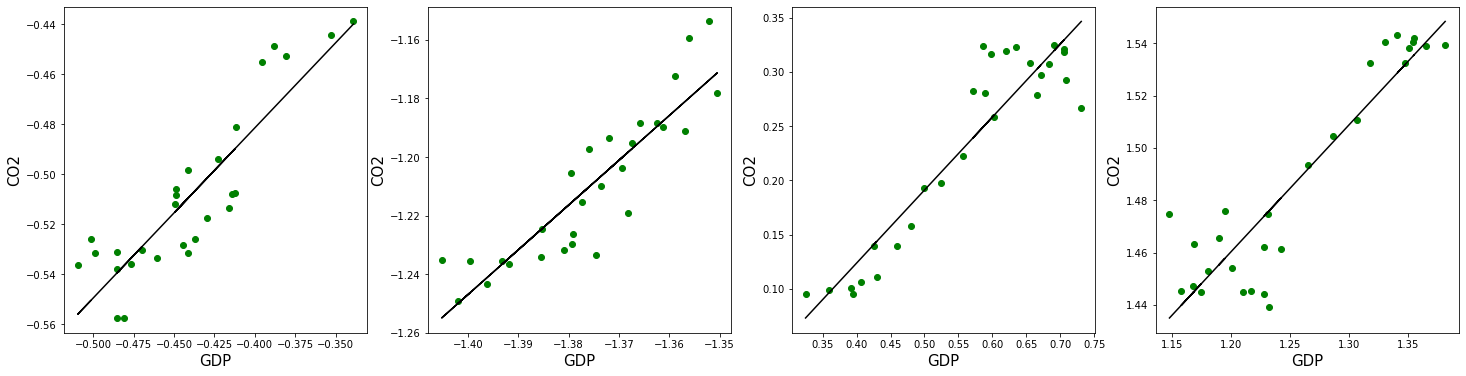

In [55]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

res_list = []
rmse = []

fig, ax = plt.subplots(1,4, figsize=(25,6))
for i in range(len(df_scaled_gdp)):
    x = df_scaled_gdp.iloc[i,:].values.reshape(-1,1)
    year = df_scaled_gdp.columns.tolist()
    
    temp_covariate = pd.DataFrame()
    temp_covariate['year'] = [i for i in range(len(year))]
    temp_covariate['x'] = x
    
    y = df_scaled_co2.iloc[i,:].values.reshape(-1,1)
    reg = LinearRegression()
    locals()["model"+str(i)] = reg.fit(x, y)
#     locals()["model"+str(i)] = locals()["model"+str(i)].fit()
    pred = locals()["model"+str(i)].predict(x)
    res = x - pred
    
    res_list.append(res)
    rms = mean_squared_error(y, locals()["model"+str(i)].predict(x), squared=False)
    rmse.append(rms)
    
    ax[i].scatter(x, y,color='g')
    ax[i].plot(x, locals()["model"+str(i)].predict(x),color='k')

    ax[i].set_xlabel('GDP',fontsize=15)
    ax[i].set_ylabel('CO2',fontsize=15)
    

In [56]:
rmse

[0.015177036896674937,
 0.011650309761313163,
 0.03220392142105294,
 0.015868508032055115]

In [57]:
for i in res_list:
    print (np.sqrt(sum(i/len(res_list))))

[0.69326448]
[nan]
[1.51627643]
[nan]


/var/folders/9_/9_vdfkwj6_qftctb6wldl84m0000gn/T/ipykernel_94604/3187724010.py:2: RuntimeWarning: invalid value encountered in sqrt
  print (np.sqrt(sum(i/len(res_list))))


In [58]:
scaled_gdp_1 = pd.DataFrame(scaler.fit_transform(covariate.iloc[:,:-3].values))

In [59]:
response.drop('index',axis=1,inplace=True)

/var/folders/9_/9_vdfkwj6_qftctb6wldl84m0000gn/T/ipykernel_94604/1896485020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response.drop('index',axis=1,inplace=True)


In [85]:
scaled_co2_1 = pd.DataFrame(scaler.fit_transform(response.iloc[:,:-1].values))

In [86]:
# len(scaled_co2_1)
# y = scaled_co2_1.iloc[i,:].values.reshape(-1,1)
scaled_co2_1.shape

(56, 28)

In [87]:
res_list_1 = []

# xx = 0
# yy = 0
for i in range(len(scaled_gdp_1)):
    x = scaled_gdp_1.iloc[i,:].values.reshape(-1,1)
    y = scaled_co2_1.iloc[i,:].values.reshape(-1,1)
    reg = LinearRegression()
    # print(x.shape)
    # xx = x
    locals()["modelA"+str(i)] = reg.fit(x, y)
    
    pred = locals()["modelA"+str(i)].predict(x)
    res = x - pred
    
    res_list_1.append(res)



In [88]:
residual_list = pd.DataFrame(np.concatenate(res_list_1,axis=1))

In [89]:
from sklearn.cluster import KMeans

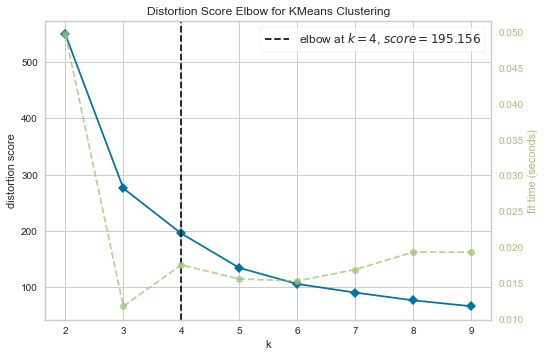

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(residual_list.T)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In above graph it shows Disortion Score Elbow for KMeans Clustering in which elbow at K-4.

KElbowVisualizer visualizes the clusters according to a scoring function, looking for an "elbow" in the curve.

In [91]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(residual_list.T)

In [92]:
scaled_co2_1['cluster'] = kmeans.labels_.tolist()

In [93]:
scaled_gdp_1['cluster'] = kmeans.labels_.tolist()

In [94]:
len(kmeans.labels_)

56

In [95]:
df_scaled_gdp_1 = scaled_gdp_1.groupby(['cluster']).mean()

In [96]:
df_scaled_co2_1 = scaled_co2_1.groupby(['cluster']).mean()

In [97]:
df_scaled_co2_1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.452591,-0.454708,-0.452604,-0.445233,-0.438966,-0.425894,-0.423123,-0.418750,-0.422723,-0.433368,...,-0.478105,-0.492180,-0.492074,-0.481893,-0.480581,-0.482638,-0.488106,-0.477295,-0.486669,-0.487512
1,1.819684,1.775091,1.676288,1.687692,1.755611,1.741693,1.725661,1.684684,1.723243,1.756082,...,2.127109,2.188339,2.164506,2.072448,2.078737,2.104870,2.118066,2.030691,2.074008,2.067142
2,0.273277,0.267955,0.329884,0.269267,0.287626,0.312460,0.271565,0.263933,0.249904,0.233832,...,-0.092699,-0.086263,-0.101670,-0.090006,-0.120456,-0.142222,-0.171488,-0.177843,-0.177584,-0.173134
3,-0.047795,-0.013052,-0.021005,0.008448,-0.061809,-0.111256,-0.072640,-0.054879,-0.052685,-0.027922,...,0.184490,0.182348,0.209073,0.221843,0.242635,0.253592,0.287415,0.312348,0.313198,0.315121


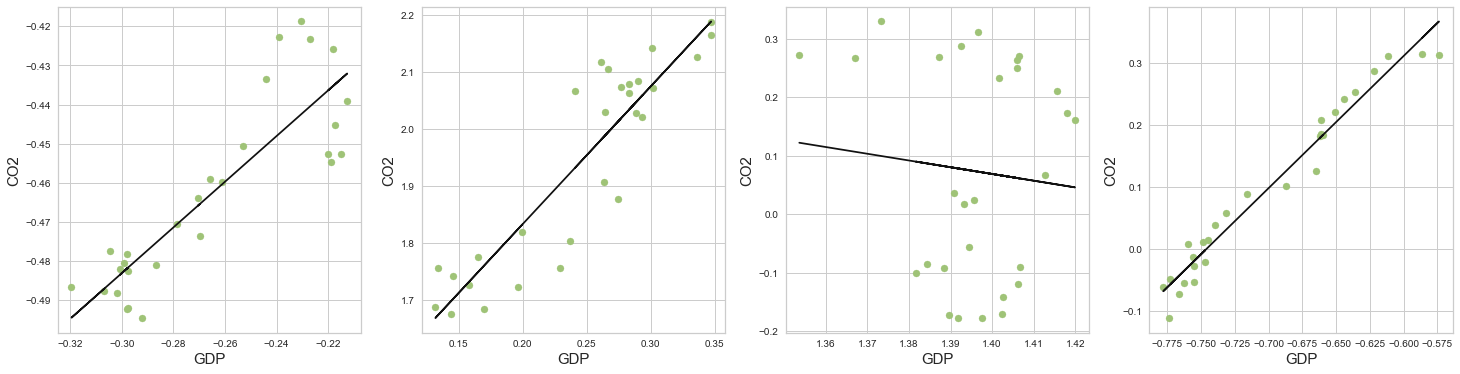

In [99]:

res_list = []
rmse = []
mse = []

fig, ax = plt.subplots(1,4, figsize=(25,6))
for i in range(len(df_scaled_gdp_1)):
    x = df_scaled_gdp_1.iloc[i,:].values.reshape(-1,1)
    year = df_scaled_gdp_1.columns.tolist()
    
#     temp_covariate = pd.DataFrame()
#     temp_covariate['year'] = [i for i in range(len(year))]
#     temp_covariate['x'] = x
    
    y = df_scaled_co2_1.iloc[i,:].values.reshape(-1,1)
    reg = LinearRegression()
    locals()["model"+str(i)] = reg.fit(x, y)
#     locals()["model"+str(i)] = locals()["model"+str(i)].fit()
    pred = locals()["model"+str(i)].predict(x)
    res = x - pred
    
#     res_list.append(res)
    mse.append(res**2)
    rms = mean_squared_error(y, locals()["model"+str(i)].predict(x), squared=False)
    rmse.append(rms)
    
    ax[i].scatter(x, y,color='g')
    ax[i].plot(x, locals()["model"+str(i)].predict(x),color='k')

    ax[i].set_xlabel('GDP',fontsize=15)
    ax[i].set_ylabel('CO2',fontsize=15)

In [100]:
for i in mse:
    print (np.sqrt(sum(i/len(mse))))

[0.52334909]
[4.49221084]
[3.49912393]
[2.11760119]


In [101]:
rmse

[0.011642154161769598,
 0.07388387304375739,
 0.18037251039202853,
 0.026155881556656727]

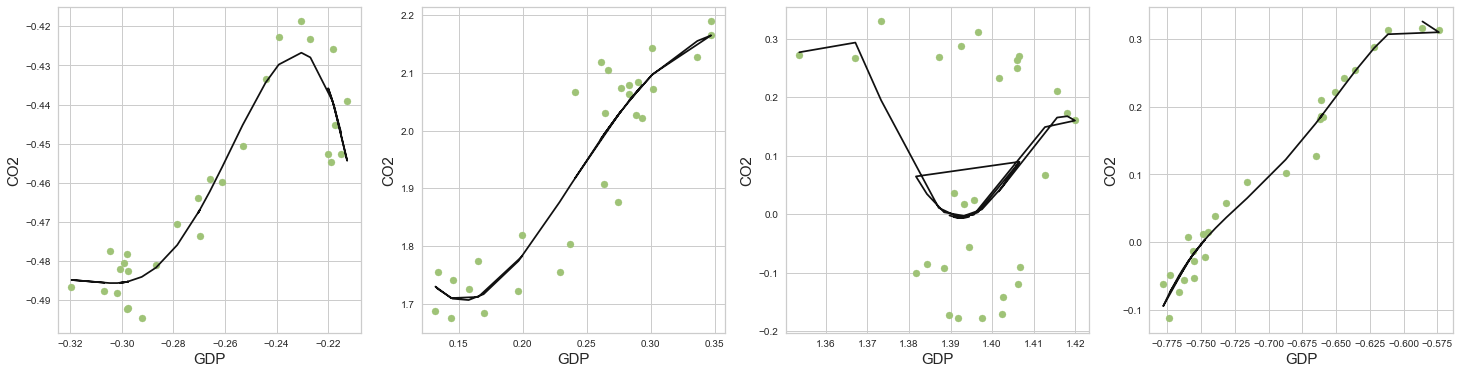

In [102]:
from sklearn.preprocessing import PolynomialFeatures

res_list = []
mse = []

fig, ax = plt.subplots(1,4, figsize=(25,6))
for i in range(len(df_scaled_gdp_1)):
    x = df_scaled_gdp_1.iloc[i,:].values.reshape(-1,1)
#     year = df_scaled_gdp_1.columns.tolist()
    
#     temp_covariate = pd.DataFrame()
#     temp_covariate['year'] = [i for i in range(len(year))]
#     temp_covariate['x'] = x
    poly = PolynomialFeatures(degree = 4)
    X_poly = poly.fit_transform(x)
    
    y = df_scaled_co2_1.iloc[i,:].values.reshape(-1,1)
    poly.fit(X_poly, y)
#     lin2 = LinearRegression()
#     lin2.fit(X_poly, y)
    reg = LinearRegression()
    locals()["model"+str(i)] = reg.fit(X_poly, y)
#     locals()["model"+str(i)] = locals()["model"+str(i)].fit()
    pred = locals()["model"+str(i)].predict(X_poly)
    res = X_poly - pred
    
#     res_list.append(res)
    mse.append(res**2)
    rms = mean_squared_error(y, locals()["model"+str(i)].predict(X_poly), squared=False)
    rmse.append(rms)
    
    
    ax[i].scatter(x, y,color='g')
    ax[i].plot(x, locals()["model"+str(i)].predict(X_poly),color='k')

    ax[i].set_xlabel('GDP',fontsize=15)
    ax[i].set_ylabel('CO2',fontsize=15)

In [103]:
rmse

[0.011642154161769598,
 0.07388387304375739,
 0.18037251039202853,
 0.026155881556656727,
 0.007740643020033996,
 0.06857983595184168,
 0.16010389671115477,
 0.021246689342294293]

In [104]:
y.shape

(28, 1)

In [105]:
for i in mse:
    print (np.sqrt(sum(i/len(mse))))

[3.87153187 0.52385458 1.41934046 1.17385002 1.24156267]
[2.52044788 4.49279953 4.97411977 5.09961983 5.13410517]
[2.46119756 3.50601985 4.96751664 7.01085244 9.86730315]
[2.41671451 2.11798578 1.20260194 1.19328239 0.70248269]


## Challenges faced:
Understanding of the functional linear model  
Took time to understand how to implement the mixture of functional linear model  
Basis function and why it is important for functional model  
Fitting the best fit model for the data took a little more time  


## Improvements
We could have back-test the model on historical data and different countries for the validation of the model  
Should have tried different regression other than linear regression like SVM regression.  


# GITHUB LINK :
